In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from math import sqrt
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\merly\OneDrive\Documents\indian_liver_patient.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape

(583, 11)

In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df['Albumin_and_Globulin_Ratio'].fillna(int(df['Albumin_and_Globulin_Ratio'].mean()),inplace=True)

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

#is patient=1 ,is not patient=0

df['Dataset']=le.fit_transform(~df['Dataset'])
df['Dataset'].unique()
x=df.drop('Dataset',axis=1)
y=df['Dataset']

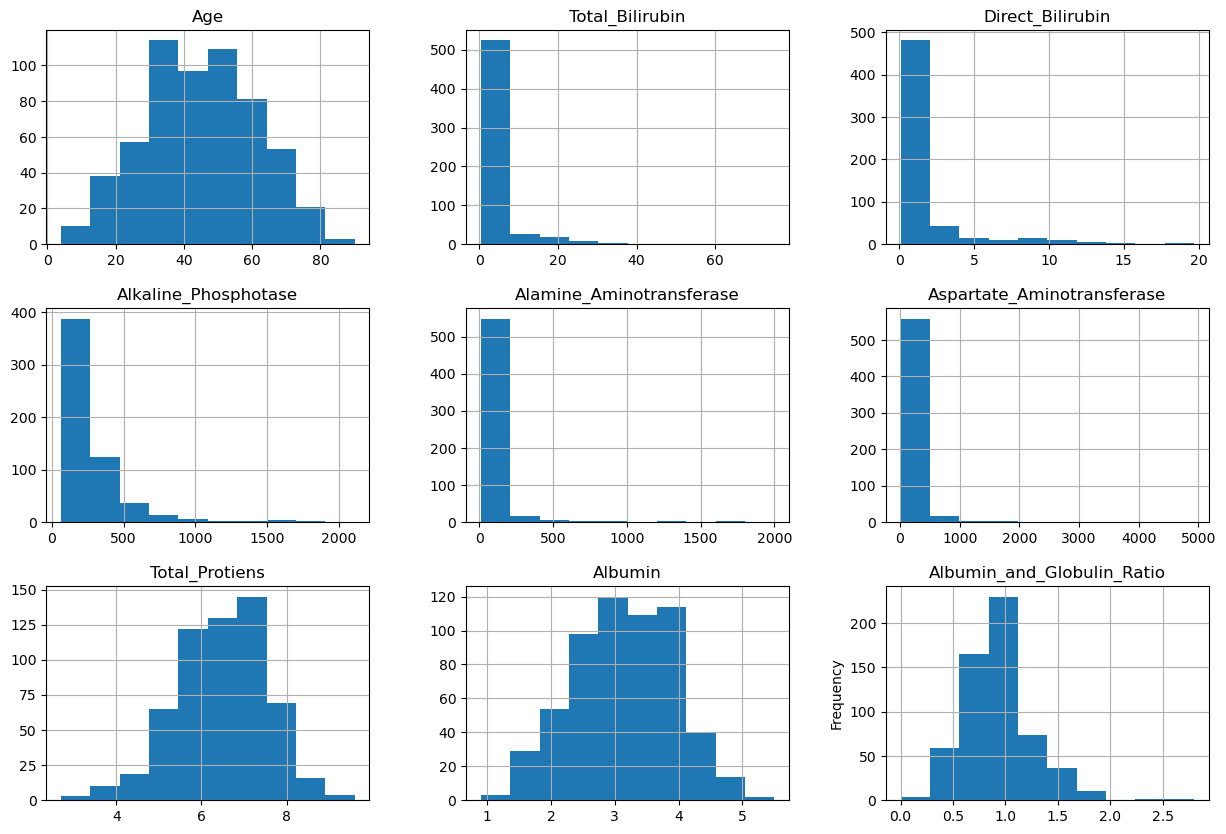

In [10]:
x.hist(figsize=(15,10))
plt.ylabel("Frequency")
plt.show()

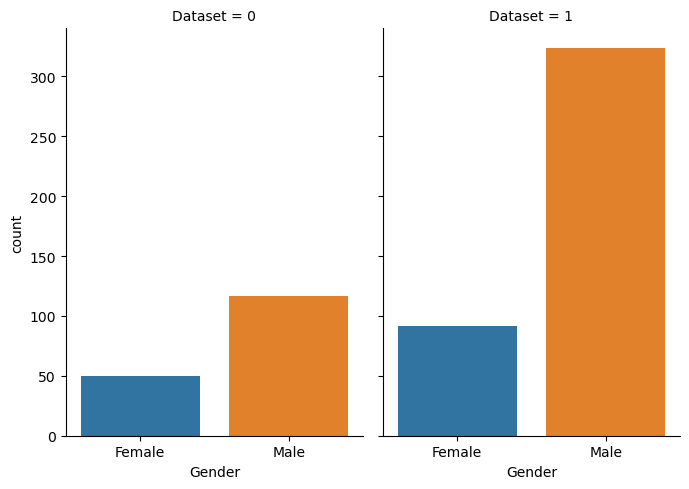

In [13]:
sns.catplot(x="Gender",col="Dataset",data=df,kind="count",height=5,aspect=.7)

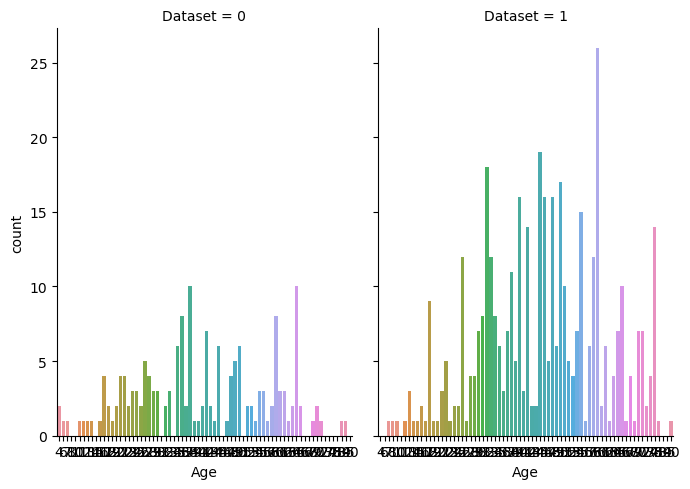

In [14]:
sns.catplot(x="Age",col="Dataset",data=df,kind="count",height=5,aspect=.7)

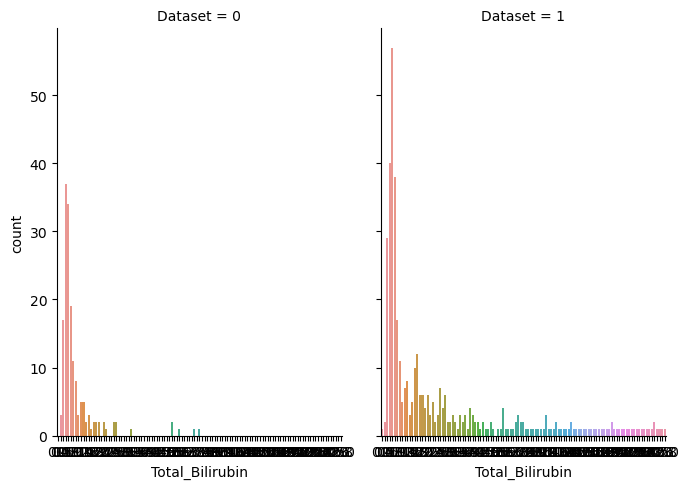

In [15]:
sns.catplot(x="Total_Bilirubin",col="Dataset",data=df,kind="count",height=5,aspect=.7)

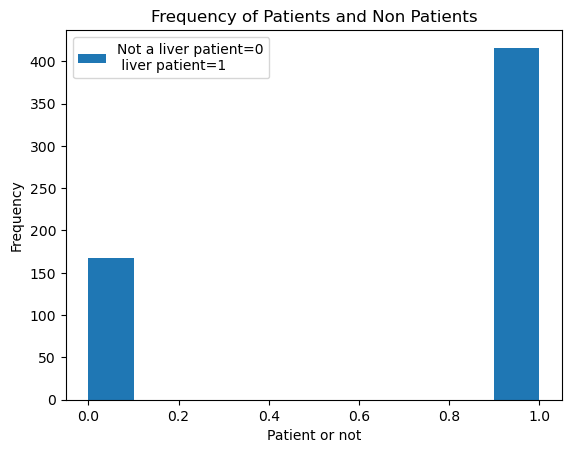

In [16]:
plt.hist(y,label="Not a liver patient=0\n liver patient=1")
plt.xlabel("Patient or not")
plt.ylabel("Frequency")
plt.title("Frequency of Patients and Non Patients")
plt.legend()
plt.show()

In [17]:
df['Gender']=le.fit_transform(df['Gender'])
x=df.drop('Dataset',axis=1)
y=df['Dataset']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.70930233, 0.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.32142857],
       [0.6744186 , 1.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.26428571],
       [0.6744186 , 1.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.31785714],
       ...,
       [0.55813953, 1.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.35714286],
       [0.31395349, 1.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.35714286],
       [0.39534884, 1.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.53571429]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)
import sklearn.metrics as metrics

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
clf=DecisionTreeClassifier(criterion='gini',random_state=2)
rfedt=RFE(clf,n_features_to_select=7,step=1)
rfedt=rfedt.fit(x_train,y_train)
rfedt.support_

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True])

In [22]:
rfedt.ranking_

array([1, 4, 1, 3, 1, 1, 1, 1, 2, 1])

In [23]:
y_pred=rfedt.predict(x_test)

accuracy_score(y_pred,y_test,normalize=False)

75

In [24]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[16, 17],
       [25, 59]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

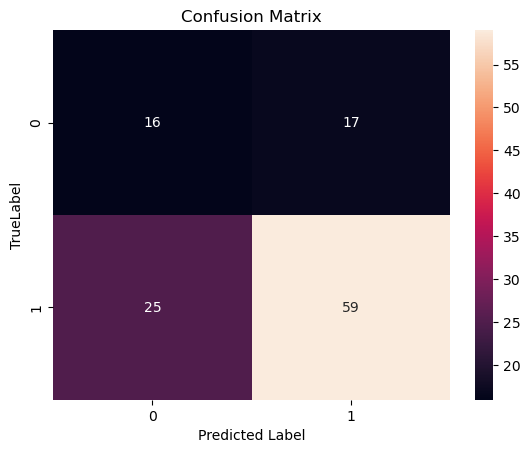

In [25]:
sns.heatmap(cnf_matrix,annot=True,cbar=True)
plt.ylabel("TrueLabel")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [28]:
df=pd.read_excel(r"C:\Users\merly\Downloads\titanic.xlsx")

In [7]:
df.shape

(891, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [9]:
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
df.tail()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
886,male,27.0,0,0,13.00,S,Second,man,True,0
887,female,19.0,0,0,30.00,S,First,woman,True,1
888,female,NaN,1,2,23.45,S,Third,woman,False,0
889,male,26.0,0,0,30.00,C,First,man,True,1
890,male,32.0,0,0,7.75,Q,Third,man,True,0


In [11]:
df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [29]:
df['age']=round(df['age'].fillna(df['age'].mean()))
df['age'].isnull().sum()

0

In [16]:
print(df['age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


In [31]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [33]:
df['embarked'].replace(np.NaN,'S',inplace=True)
df['embarked'].isnull().sum()

0

<AxesSubplot:xlabel='sex', ylabel='survived'>

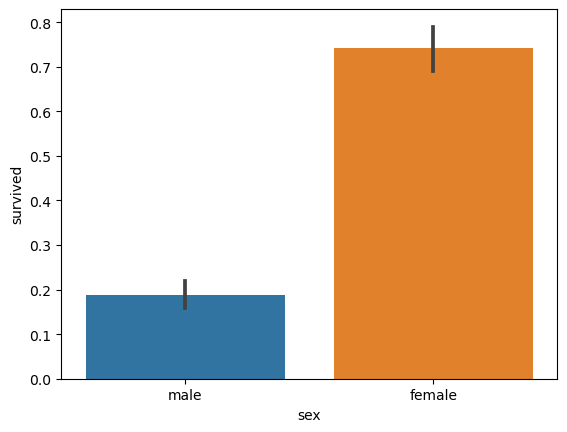

In [35]:
sns.barplot(x='sex',y='survived',data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

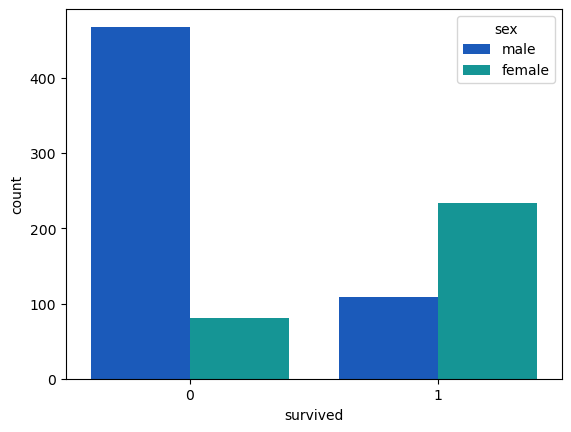

In [37]:
sns.countplot(data=df,x='survived',hue='sex',palette='winter')

In [39]:
bins=[0,5,12,18,30,60,np.inf]
labels=['baby','Child','Teenager','Young Adult','Adult','Senior']
df['AgeGroup']=pd.cut(df['age'],bins,labels=labels)

<AxesSubplot:xlabel='AgeGroup', ylabel='survived'>

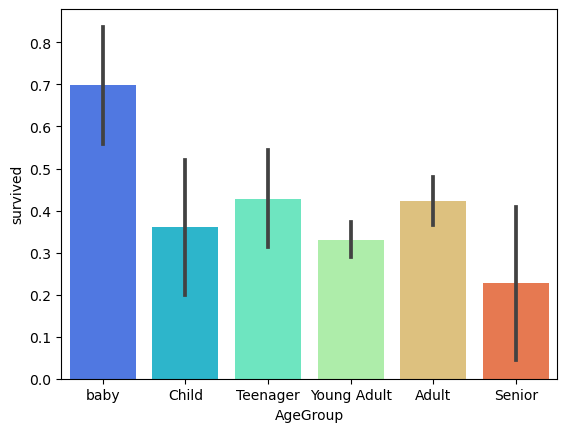

In [44]:
sns.barplot(data=df,x='AgeGroup',y='survived',palette='rainbow')

In [45]:
df.drop(['AgeGroup'],axis=1,inplace=True)
df.drop(['who'],axis=1,inplace=True)
df.drop(['alone'],axis=1,inplace=True)

In [46]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,survived
0,male,22.0,1,0,7.2500,S,Third,0
1,female,38.0,1,0,71.2833,C,First,1
2,female,26.0,0,0,7.9250,S,Third,1
3,female,35.0,1,0,53.1000,S,First,1
4,male,35.0,0,0,8.0500,S,Third,0


In [48]:
cols=['sex','sibsp','embarked','class']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

In [49]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,survived
0,1,22.0,1,0,7.2500,2,2,0
1,0,38.0,1,0,71.2833,0,0,1
2,0,26.0,0,0,7.9250,2,2,1
3,0,35.0,1,0,53.1000,2,0,1
4,1,35.0,0,0,8.0500,2,2,0


In [51]:
X=df.drop(['survived'],axis=1)
Y=df['survived']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [54]:
Knn=KNeighborsClassifier()

In [56]:
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
y_pred=Knn.predict(x_test)

C:\Users\merly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
round(accuracy_score(y_pred,y_test),2)

0.73

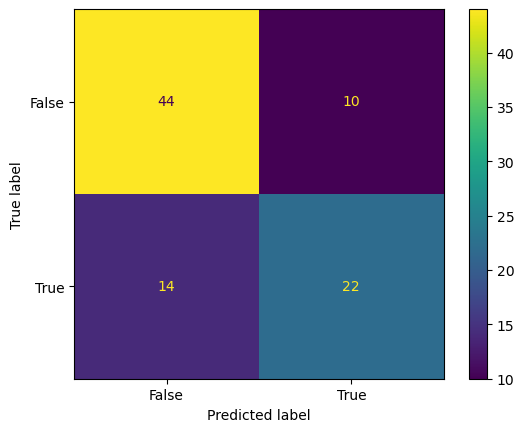

In [70]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_test,y_pred)

cn=metrics.ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=[False,True])
cn.plot()
plt.show()